In [1]:
from astropy.io import fits
import h5py
from pixell import enmap


data_path = '/home/aroman/data/'

act_path = data_path + 'act/'
map_path = act_path + 'act_planck_s08_s19_cmb_f150_daynight_srcfree_map.fits' # private, reference map

data_base = '/home/aroman/data/vr_source/desils/'

cat_base = 'desils_randcat_'
cat_north_path = data_base + cat_base + 'north.h5'
cat_south_path = data_base + cat_base + 'south.h5'

map_t = enmap.read_map(map_path)[0]
print(map_t.wcs)

with h5py.File(cat_south_path, 'r') as cat_south:
    print(cat_south.keys())
    decs = cat_south['dec_deg']
    ras = cat_south['dec_deg']
    print(decs.dtype.itemsize)


# v01 = ['north_cmass']
# v01 = [data_base + 'v01_desils_' + fname for fname in v01]




car:{cdelt:[-0.008333,0.008333],crval:[0,0],crpix:[21601.00,7561.00]}
<KeysViewHDF5 ['dec_deg', 'maskbits', 'nobs_g', 'nobs_r', 'nobs_z', 'ra_deg']>
8


<KeysViewHDF5 ['Gmag', 'W1mag', 'W2mag', 'dec_deg', 'fracflux_g', 'fracflux_r', 'fracflux_z', 'fracin_g', 'fracin_r', 'fracin_z', 'fracmasked_g', 'fracmasked_r', 'fracmasked_z', 'gmag', 'maskbits', 'morphology', 'nobs_g', 'nobs_r', 'nobs_z', 'ra_deg', 'rfibermag', 'rmag', 'vr_smoothed_0.25', 'vr_smoothed_0.5', 'vr_smoothed_0.75', 'vr_smoothed_1.0', 'vr_smoothed_1.25', 'vr_smoothed_1.5', 'vr_smoothed_1.75', 'vr_smoothed_2.0', 'vr_unsmoothed', 'z', 'zerr', 'zfibermag', 'zmag']>


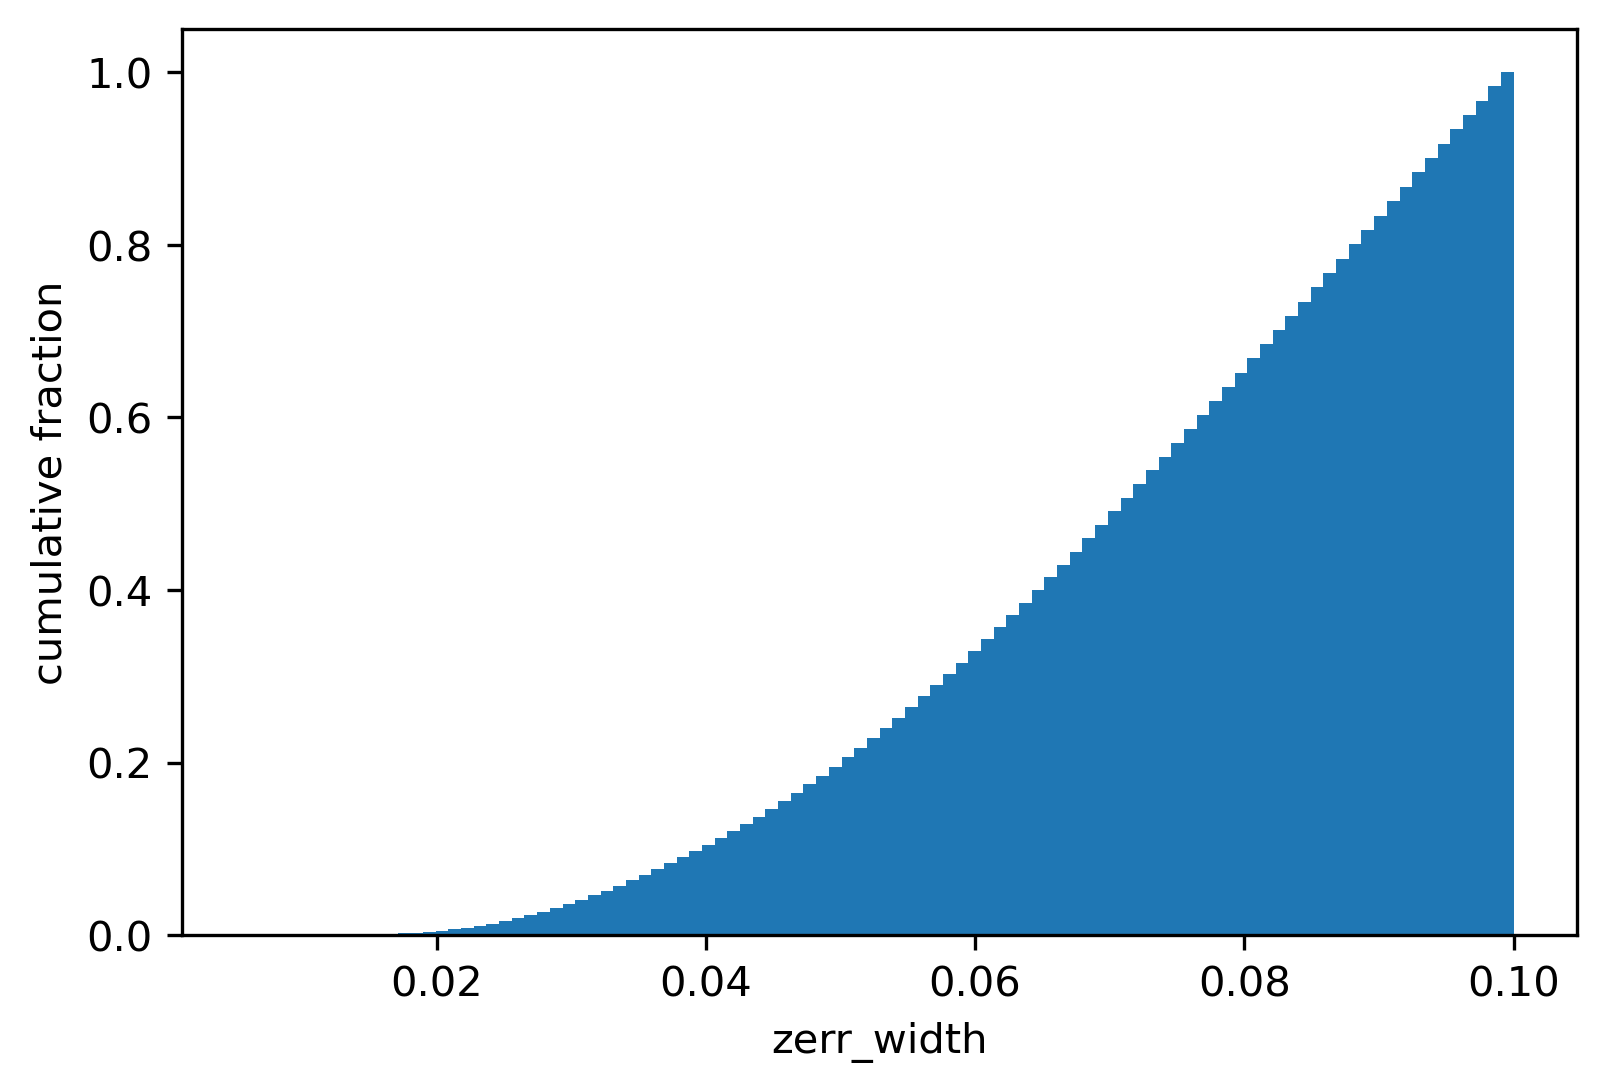

In [5]:
from astropy.io import fits
import h5py
from pixell import enmap

import matplotlib.pyplot as plt

data_base = '/home/aroman/data/vr_source/desils/'

cat_north_path = data_base + 'v03_desils_north_cmass.h5'
cat_south_path = data_base + 'v03_desils_south_cmass.h5'

with h5py.File(cat_south_path, 'r') as cat:
    print(cat.keys())
    
    nz = cat['z'].size
    ndec = cat['dec_deg'].size
    assert nz == ndec
    
    zerrs = cat['zerr'][:]
#     zerrs = zerrs[zerrs < 0.023]
    plt.figure(dpi=300)
    plt.hist(zerrs, bins=100, cumulative=True, density=True)
    plt.ylabel('cumulative fraction')
    plt.xlabel('zerr_width')
#     plt.axvline(0.05, color='black')
#     plt.axhline(0.8, color='black')
    
    